# Support Vector Machines
Algoritmo de Machine learning supervisado tanto como para clasificacion y como regresion lineal

Consiste en analizar la distancia que existe entre dos puntos contenido en un interplano `n`.

Los iperplanos resultantes de este analisis siempre es un plano `n-1`. Si se encuentra un plano que pueda diferenciar dos cluster se denomina `interplano maximizador de margen` o `perfectron`.


## Matematicamente

`X^T*w + b = 0` En otras palabras, X traspuesta (estamos hablando de matrices) por w (siendo un vector perpendicular al interplano maximizador) y b es una constante que dice que tan desplazado a la ordenada del origen.

https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte

## Linear Support Vector Machine Classifier

El objetivo es intentar encajar los daots que le ingresemos y que trata de buscar el interplano que sea capas de categorizarlos.

`from sklearn import svm`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm

In [2]:
style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,8)

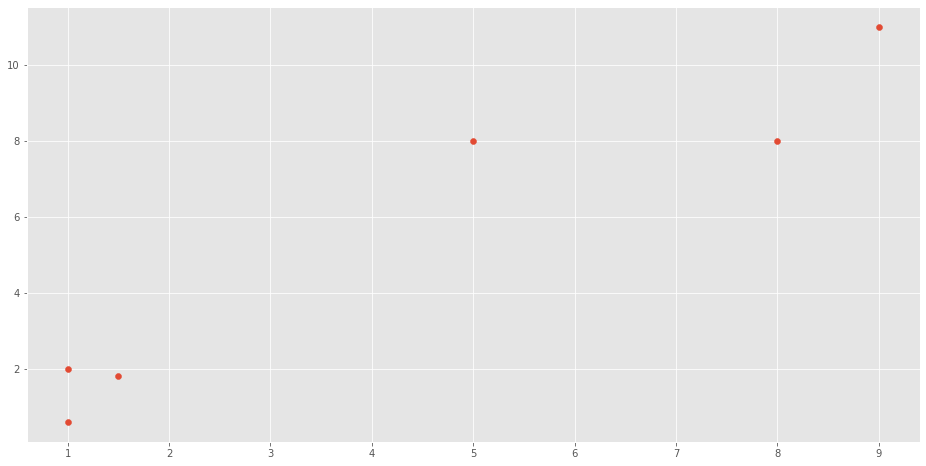

In [3]:
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]
plt.scatter(X,Y)
plt.show()

In [4]:
data = np.array(list(zip(X,Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [5]:
target = [0,1,0,1,0,1]
#tener una lista de rasgos numericos para determinar la etiqueta que deberia tener

In [6]:
#Support Vector classifier = ( kernel = metodo , c = forma de evaluar que tal mal se debe clasificar)
#lineal el tipo de interplano
classifier = svm.SVC(kernel='linear' , C=1)
classifier.fit(data,target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Ahora con el modelo entrenado vamos a ver donde entran los puntos que vayamos ingresando

In [7]:
p = np.array([0.57,0.67]).reshape(1,2)
print(p)
classifier.predict(p)
##Estro denoto que el punto que acabamos de ingresar se encuentra dentro de esa calsificacion

[[0.57 0.67]]


array([0])

* Modelo: `W0.x + W1.y + err = 0`
* Ecuacion del iperplano: `y = a.x + b`

In [8]:
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [9]:
a = -w[0]/w[1]
print('Coenficiente a: ',a)
b = -classifier.intercept_[0]/w[1]
print('Ordenada al Origen: ',b)

Coenficiente a:  -0.5645161290322581
Ordenada al Origen:  6.734677437813051


In [10]:
xx = np.linspace(0,10)
yy =  (a*xx) + b

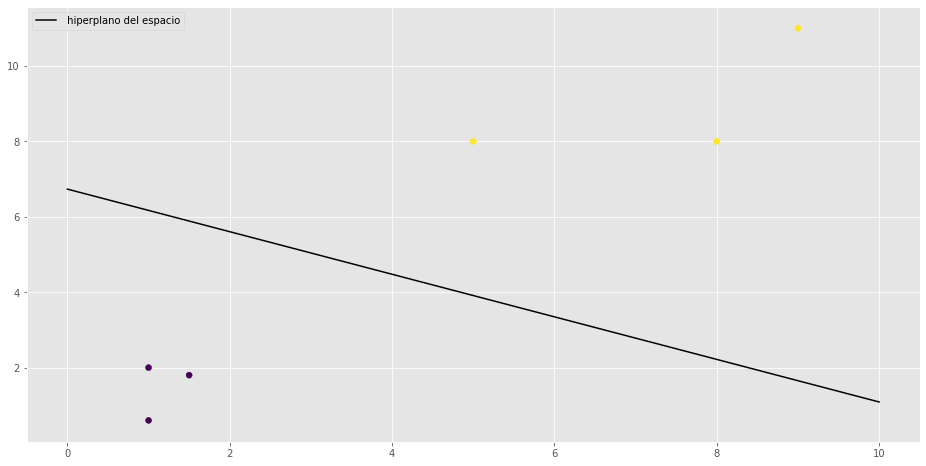

In [11]:
plt.plot(xx,yy,'k-',label= ' hiperplano del espacio')
plt.scatter(X,Y , c=target)
plt.legend()
plt.show()

## Support Vector Machines

`from sklearn import svm`

Ahora veremos como funciona internamente este algoritmo

In [12]:
from scipy import stats
import seaborn as sns; sns.set()

In [13]:
from sklearn.datasets.samples_generator import make_blobs

/home/santiago/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [14]:
X , Y = make_blobs(n_samples=50, centers= 2 , random_state=0 , cluster_std=0.6)

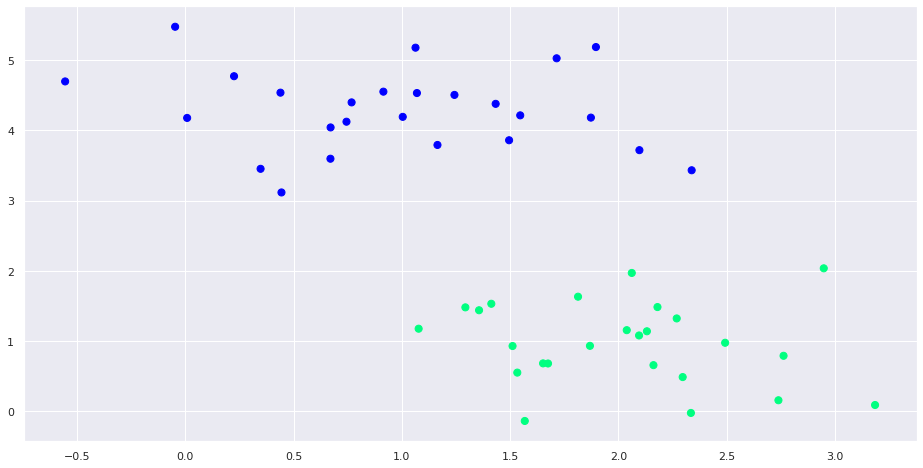

In [15]:
plt.scatter(X[:,0],X[:,1],c = Y , s= 50, cmap='winter')

(-1, 3.5)

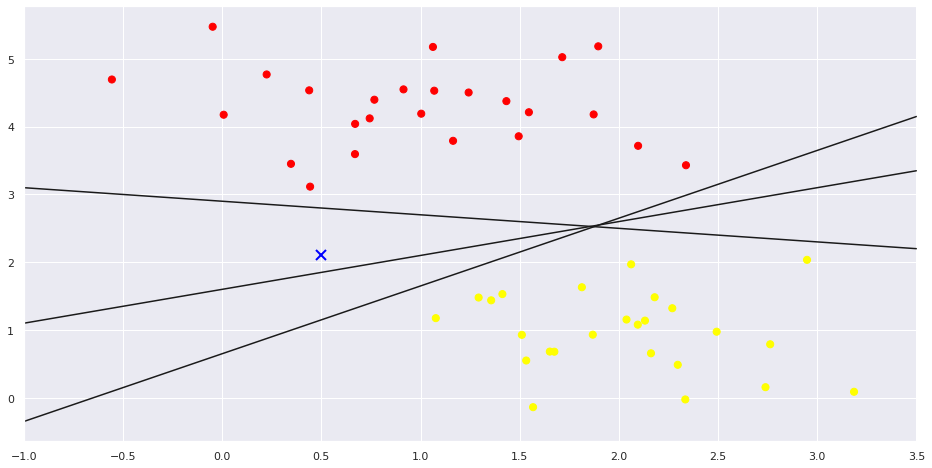

In [16]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

## Maximizacion del Margen
La solucion que propone el algoritmo a este tipo de problemas donde no esta claro que tipo de clasificacion deberia corresponder, es en vez de crear lineas rectas, porque no mejor pintar un corredor con un anchura hasta encontrar el primer punto.

(-1, 3.5)

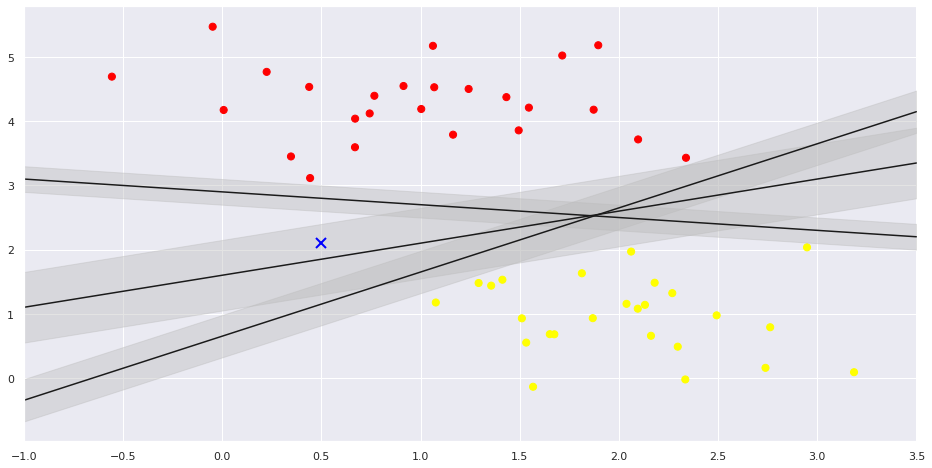

In [17]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap="autumn")
plt.plot([0.5], [2.1], 'x', color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65, 0.33), (0.5, 1.6,0.55), (-0.2, 2.9, 0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color="#BBBBBB", alpha = 0.4)
    
plt.xlim(-1,3.5)

## Creacion del Modelo a traves de SVM

In [18]:
model = svm.SVC(kernel='linear' , C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


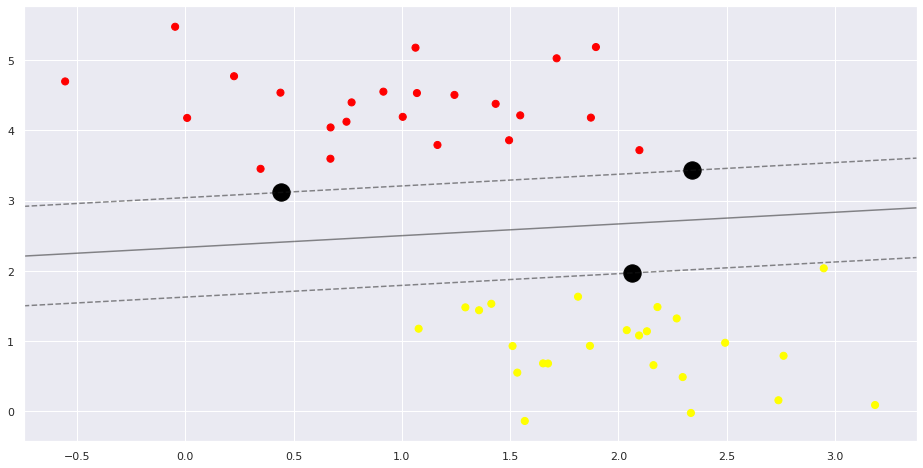

In [20]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)

In [32]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = svm.SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    


[[1.21569789 2.64023167]
 [0.63351538 1.41609504]
 [2.25861    2.1102898 ]]
[[1.21569789 2.64023167]
 [0.63351538 1.41609504]
 [2.25861    2.1102898 ]]


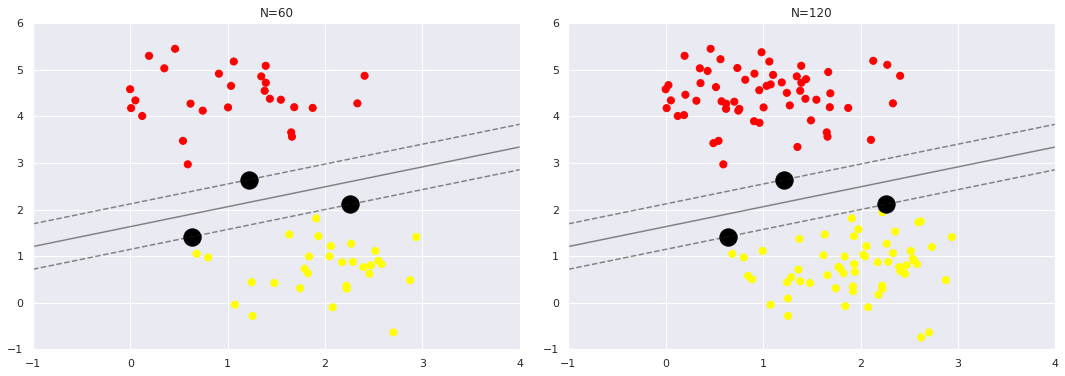

In [33]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [34]:
from ipywidgets import interact, fixed

In [40]:
#Funcion, y luego los parametros
interact(plot_svm, N=[10,20,30,40,50,100,150,200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 100, 150, 200), value=10), Output…

<function __main__.plot_svm(N=10, ax=None)>